References: 1) www.gaussianprocess.org/gpml/
            2) https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process
            
As last time, we begin by creating data to fit our process to.  For this example we will use one dimensional training points for the purpose of visualization.  Below, I select 10 points uniformly between 0 and 10, take the sin() function of each point and add noise.  Our y-labels which the gaussian process will fit will be the sign value + noise 

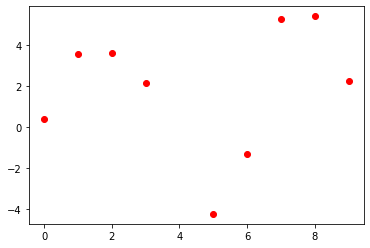

In [1]:
import numpy as np
num_points = 10

x_train = np.arange(0,10, 1)

x_train_reduced = np.delete(x_train, 4).reshape(-1,1)

noise = np.random.randn(num_points)
y_train = 5*np.sin(x_train) + noise
y_train_reduced = np.delete(y_train, 4).reshape(-1,1)

x_test = np.arange(np.min(x_train),np.max(x_train),0.1).reshape(-1,1)

import matplotlib.pyplot as plt
plt.plot(x_train_reduced, y_train_reduced, 'or', label='random training points')
plt.show()

Next we import the gaussian process regressor and a kernel function to use.  For this example we will use the radial basis function (RBF) 

RBF(x,y) = exp(1/2|x-y|^2)

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = RBF(length_scale=0.5)

print("training dimensions: ", x_train_reduced.shape)
print("covariance matrix dimensions: ", kernel(x_train_reduced).shape)

model = GaussianProcessRegressor(kernel=kernel)

model.fit(x_train_reduced, y_train_reduced)

mean, std = model.predict(x_test, return_std=True)





training dimensions:  (9, 1)
covariance matrix dimensions:  (9, 9)


95% confidence interval = 1.96*std of a gaussian

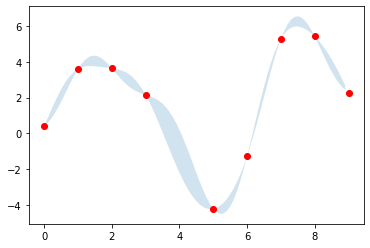

In [8]:

ci = 1.96*std.reshape(-1)
mean = mean.reshape(-1)

plt.plot(x_train_reduced, y_train_reduced, 'or', label='training points')

plt.fill_between(x_test.reshape(-1), mean - ci, mean + ci, alpha=0.2, label='function with 95% confidence')

plt.show()

Now lets rerun the gaussian process after sampling from x=4

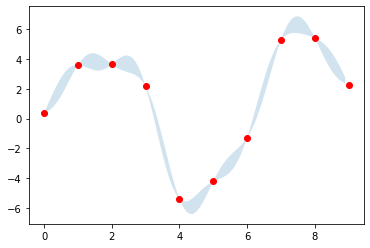

In [9]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

model.fit(x_train, y_train)

mean, std = model.predict(x_test, return_std=True)

ci = 1.96*std.reshape(-1)
mean = mean.reshape(-1)

plt.plot(x_train, y_train, 'or', label='training points')

plt.fill_between(x_test.reshape(-1), mean - ci, mean + ci, alpha=0.2, label='sampled function with 95% confidence')

plt.show()